## Customer Retail Purchase Data (2023)

**📌 Dataset Overview**

This dataset records customer purchases across several product categories during the year 2023. It captures critical customer attributes like age and gender, alongside transaction details including product category, quantity purchased, and total amount spent. It is ideal for analyzing consumer behavior, identifying sales trends, and building recommendation or forecasting models.

**📂 Columns Description**

*   **Date:** Date of the transaction.
*   **Gender:** Gender of the customer.
*   **Age:** Age of the customer at the time of purchase.
*   **Product Category:** Category of the purchased item (e.g., Beauty, Clothing, Electronics).
*   **Quantity:** Number of units purchased in the transaction.
*   **Price per Unit:** Cost of one item in the selected category.
*   **Total Amount:** Total amount spent (Quantity × Price per Unit).

**🔍 Potential Use Cases**

*   Consumer segmentation
*   Market basket analysis
*   Sales forecasting
*   Product trend analysis
*   Customer profiling models
*   Dynamic pricing strategies

**📊 Suggested Explorations**

*   Analyze spending patterns by gender or age group.
*   Track most popular product categories over time.
*   Predict total amount spent based on customer features.
*   Identify seasonal or monthly spikes in certain categories.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_colwidth",300)
pd.set_option("display.max_column",30)

In [6]:
sales_data = pd.read_csv('Sales Dataset.csv')
sales_data.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


#### Section: Data Handling and Cleaning

In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [12]:
sales_data.dtypes

Unnamed: 0           int64
Date                object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [14]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [16]:
sales_data.dtypes

Unnamed: 0                   int64
Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [18]:
sales_data.shape

(1000, 8)

In [24]:
sales_data.isna().sum()

Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [30]:
sales_data.duplicated().sum()

0

In [32]:
sales_data.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
sales_data.drop(columns=['Unnamed: 0'], inplace=True)

In [41]:
sales_data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [43]:
sales_data.rename(columns={'Total Amount':'Total Sales'}, inplace=True)

In [45]:
sales_data.tail()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales
995,2023-05-16,Male,62,Clothing,1,50,50
996,2023-11-17,Male,52,Beauty,3,30,90
997,2023-10-29,Female,23,Beauty,4,25,100
998,2023-12-05,Female,36,Electronics,3,50,150
999,2023-04-12,Male,47,Electronics,4,30,120


In [49]:
sales_data.describe()

,Date,Age,Quantity,Price per Unit,Total Sales
count,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,NaN,13.68143,1.132734,189.681356,559.997632


#### EDA & Visualization

In [111]:
gender_counts = sales_data['Gender'].value_counts()
gender_counts

Gender
Female    510
Male      490
Name: count, dtype: int64

>The dataset contains `510` Females and `490` Males

In [114]:
gender_avgage = sales_data.groupby('Gender').agg({'Age':'mean'})
gender_avgage

,Age
Gender,
Female,41.356863
Male,41.428571


>The average of both Female and Male is 41 but the Age seems to have outliers

In [133]:
#classifi_age=sales_data.groupby("Gender")["Age"].mean().reset_index()

In [135]:
classifi_age = sales_data.groupby('Gender').agg({'Age':'mean'}).reset_index()
classifi_age

,Gender,Age
0,Female,41.356863
1,Male,41.428571


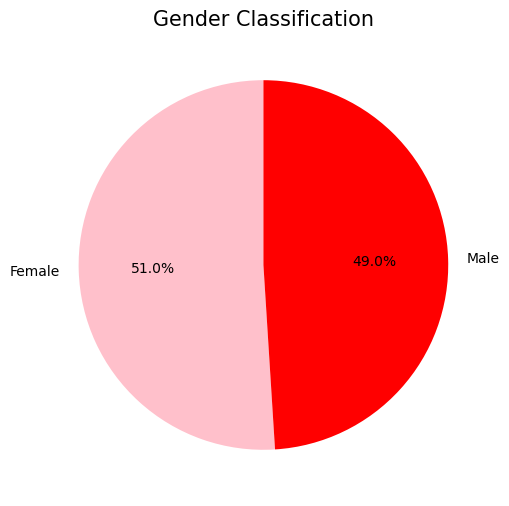

In [117]:
gender_count = sales_data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=90, colors=["pink", "red"])
plt.title("Gender Classification", fontsize=15)
plt.show()

<Figure size 800x600 with 0 Axes>

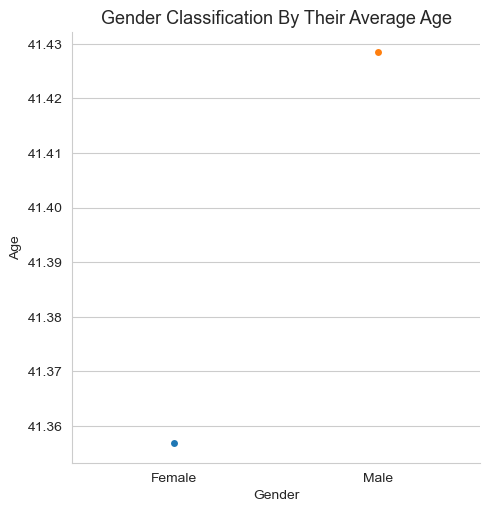

In [137]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.catplot(data=classifi_age,
            x='Gender',
            y='Age',
            hue='Gender')
plt.title('Gender Classification By Their Average Age', fontsize=13)
plt.show()

> Both the Male and Female Gender have almost the same average age

In [189]:
classifi_g = sales_data.groupby(['Gender', 'Product Category'])\
                       .agg({'Age':'mean', 'Quantity':'sum'})\
                       .reset_index()

In [191]:
classifi_g.style.background_gradient(cmap='ocean')

,Gender,Product Category,Age,Quantity
0,Female,Beauty,40.355422,418
1,Female,Clothing,43.166667,441
2,Female,Electronics,40.482353,439
3,Male,Beauty,40.390071,353
4,Male,Clothing,40.751412,453
5,Male,Electronics,42.976744,410


> How Many Product People Bought By Category And The Average Age Of Each Gender?

#### Quantity of Products Sold Per Category and Average age of customers by product category.

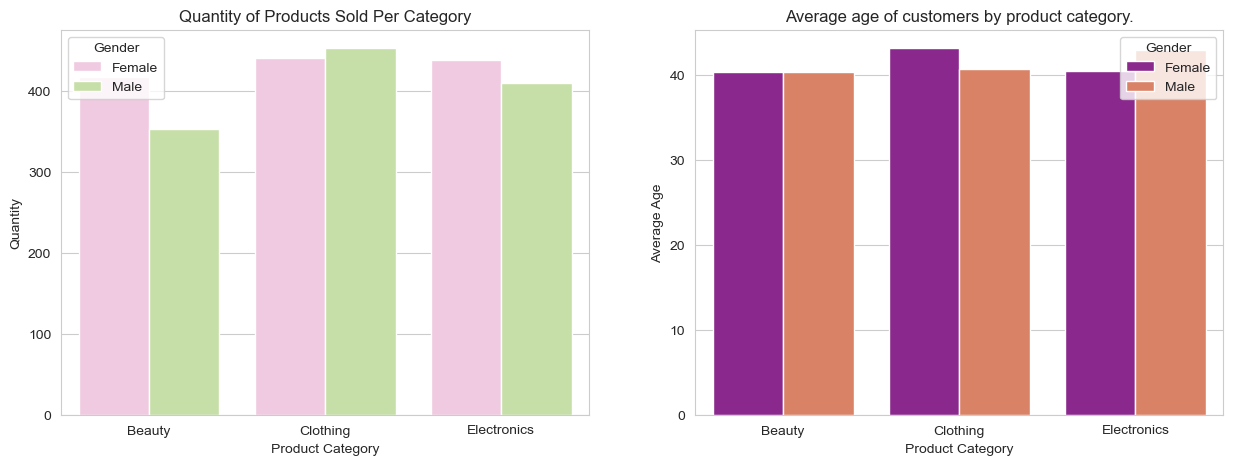

In [201]:
# Quantity of Products Sold Per Category
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=classifi_g,
            x='Product Category',
            y='Quantity',
            hue='Gender',
            palette='PiYG')
plt.title('Quantity of Products Sold Per Category')

# Average age of customers by product category
plt.subplot(1,2,2)
sns.barplot(data=classifi_g,
            x='Product Category',
            y='Age',
            hue='Gender',
            palette='plasma')
plt.title('Average age of customers by product category.')
plt.ylabel('Average Age')
plt.show()

#### Total Sales Per Product Category and Gender

In [217]:
classifi_sales = sales_data.groupby(['Gender', 'Product Category'])['Total Sales']\
                           .sum().sort_values(ascending=False).reset_index()

classifi_sales.style.background_gradient(cmap="Greens")

,Gender,Product Category,Total Sales
0,Female,Clothing,81275
1,Male,Electronics,80170
2,Female,Electronics,76735
3,Female,Beauty,74830
4,Male,Clothing,74305
5,Male,Beauty,68685


In [219]:
classifi_sale=sales_data.groupby(["Gender","Product Category"])["Total Sales"]\
                        .sum().reset_index()

import plotly.io as pio
pio.renderers.default = 'notebook'
pio.renderers.default = 'iframe_connected'

fig = px.bar(data_frame=classifi_sale,
             x='Product Category',
             y='Total Sales',
             color='Gender',
             title='Total Sales Per Product Category By Gender Ratio')

fig.update_layout(height=500, width=600)
fig.show()

> Mouse over the bars to see Total Sales values

Text(0.5, 1.0, 'Total Sales Per Product Category')

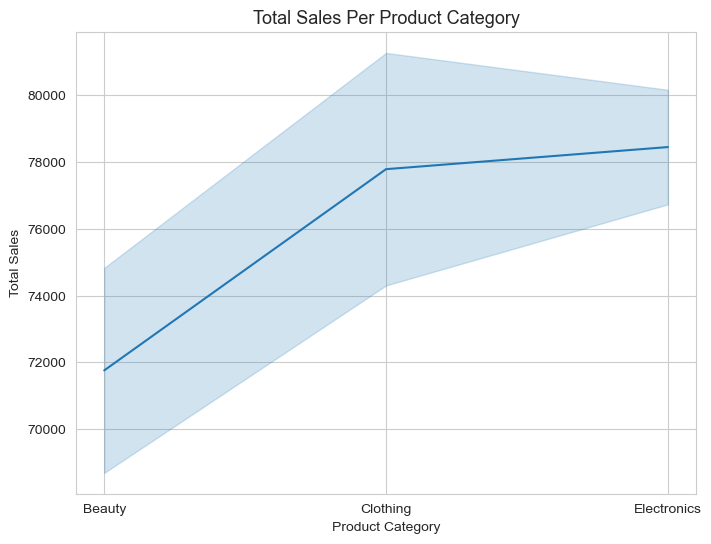

In [230]:
plt.figure(figsize=(8,6))

sns.lineplot(
    data=classifi_sale,
    x='Product Category',
    y='Total Sales'
)

plt.title('Total Sales Per Product Category', fontsize=13)

#### Total Sales,Price Per Unit & Category Classification

In [238]:
sales_data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Sales
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


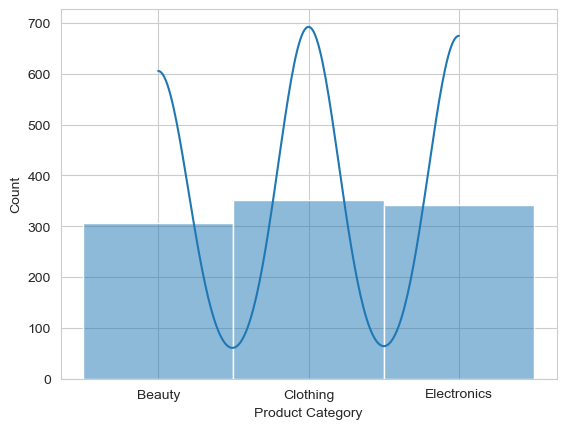

In [258]:
sns.histplot(
    data=sales_data,
    x='Product Category',
    kde=True
)

plt.show()

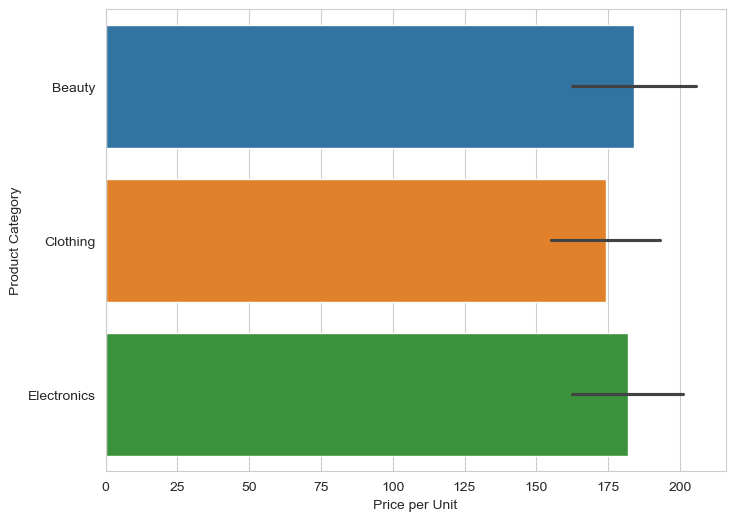

In [262]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=sales_data,
    x='Price per Unit',
    y='Product Category',
    hue='Product Category'
)

plt.show()

In [254]:
pio.renderers.default = 'notebook'
pio.renderers.default = 'iframe_connected'
fig = px.bar(
    data_frame=sales_data,
    x='Product Category',
    y='Price per Unit'
)

fig.show()

#### Time-Series Analysis(Daily Total Sales Over Time)

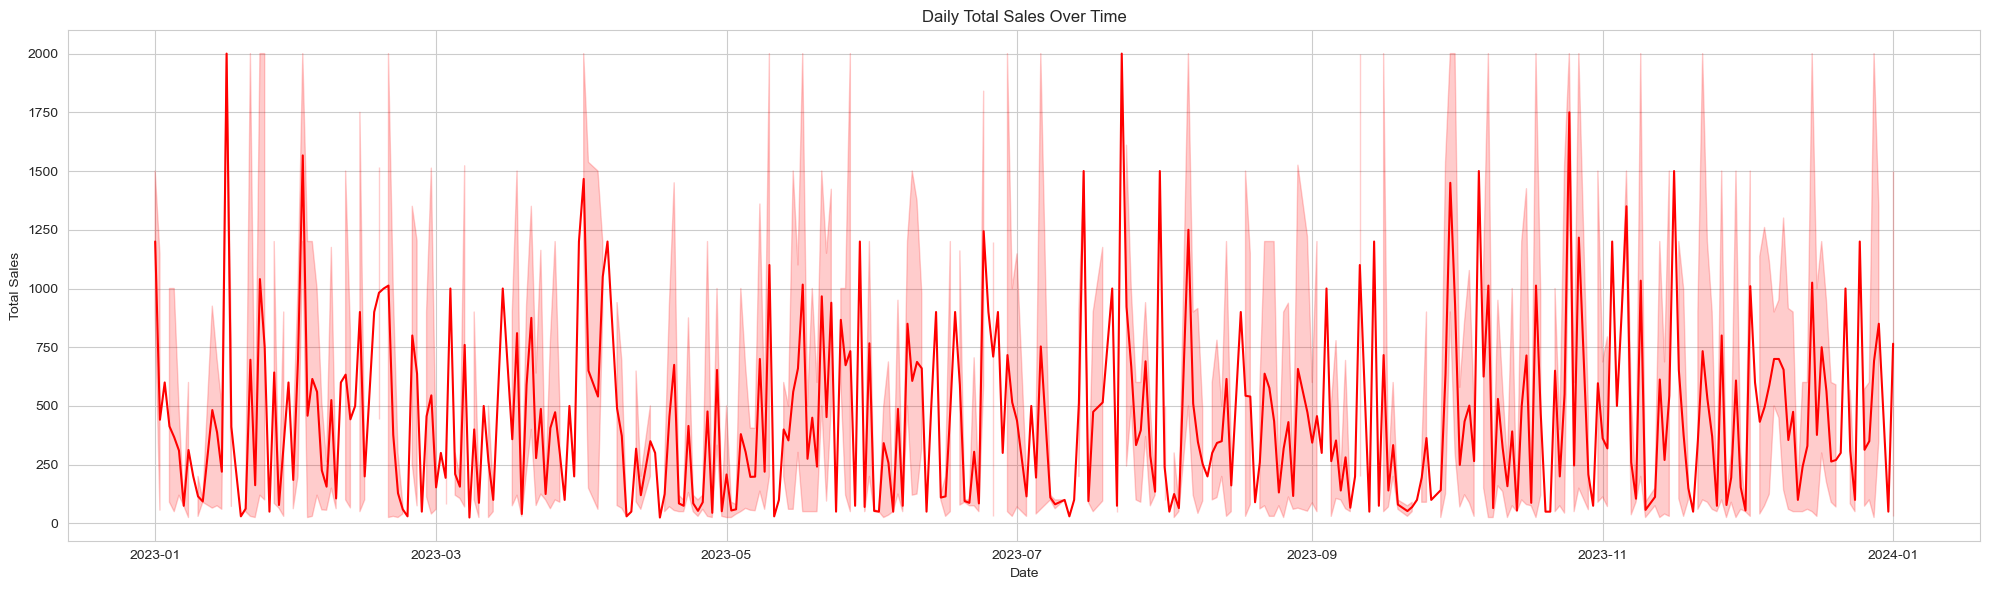

In [275]:
plt.figure(figsize=(20, 6))

sns.lineplot(
    data=sales_data,
    x='Date',
    y='Total Sales',
    markers='0',
    color='red'
)

plt.title('Daily Total Sales Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Correlation Heatmap

In [280]:
sales_data_num = sales_data.select_dtypes(include='number')
sales_data_num.head()

,Age,Quantity,Price per Unit,Total Sales
0,34,3,50,150
1,26,2,500,1000
2,50,1,30,30
3,37,1,500,500
4,30,2,50,100


In [282]:
cor = sales_data_num.corr()
cor

,Age,Quantity,Price per Unit,Total Sales
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Sales,-0.060568,0.373707,0.851925,1.000000


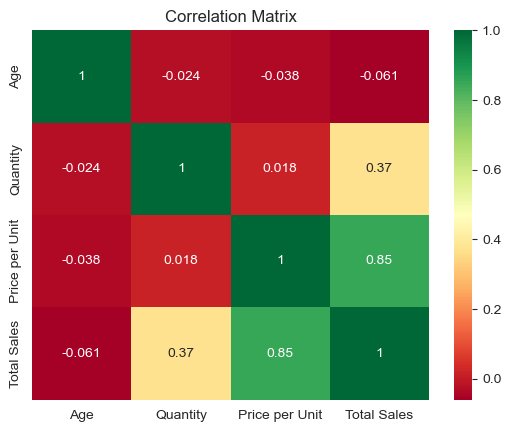

In [305]:
sns.heatmap(
    data=cor,
    annot=True,
    fmt=".2g",
    cmap= 'RdYlGn'
)

plt.title('Correlation Matrix')
plt.show()